# GROUP1
### Ama Nimako
### Mary Ogar
### Cecilia Pinkrah
### Ubaida Abdulai
### Grazia Edumaba Graham

# FoodHub Data Analysis


### Problem Statement / Business Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [3]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

### Import your data

In [4]:
# importing data as csv
food_df = pd.read_csv("foodhub_order.csv")

### Do sanity checks on the data

In [5]:
# Displaying the first 5 rows
food_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
# Displaying the last 5 rows
food_df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [28]:
# Renaming columns
food_df.rename(columns = {"cost_of_the_order" : "cost_of_the_order($)", 
                          "food_preparation_time" : "food_preparation_time(mins)",
                          "delivery_time" : "delivery_time(mins)"},
                           inplace = True)

In [6]:
food_df.head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order($),day_of_the_week,rating,food_preparation_time(mins),delivery_time(mins)
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20


In [7]:
# Checking the info summary
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
# Checking the data types in each column

food_df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [9]:
# Checking for null values
food_df.isnull().sum().sum()

0

In [10]:
# Changing data types
food_df[["order_id", "customer_id"]] = food_df[["order_id", "customer_id"]].astype(str)

In [11]:
food_df.dtypes

order_id                        object
customer_id                     object
restaurant_name                 object
cuisine_type                    object
cost_of_the_order($)           float64
day_of_the_week                 object
rating                          object
food_preparation_time(mins)      int64
delivery_time(mins)              int64
dtype: object

In [10]:
# Extracting numerical rating
ratings = food_df.loc[food_df['rating'].isin(["1", "2", "3", "4", "5"])]
ratings.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [11]:
# Changin the data type of the rating column in new ratings dataframe
ratings["rating"] = ratings["rating"].astype(int)

C:\Users\Grazia E. Graham\AppData\Local\Temp\ipykernel_5376\853128714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["rating"] = ratings["rating"].astype(int)


In [14]:
ratings.dtypes

order_id                        object
customer_id                     object
restaurant_name                 object
cuisine_type                    object
cost_of_the_order($)           float64
day_of_the_week                 object
rating                           int32
food_preparation_time(mins)      int64
delivery_time(mins)              int64
dtype: object

In [12]:
# Checking the number of times each restaurant is recorded 
food_df["restaurant_name"].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [16]:
# Checking for names of unique restaurants
food_df["restaurant_name"].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [13]:
# Number of restaurants in hub / number of unique restaurants
food_df["restaurant_name"].nunique()

178

In [14]:
# Shape of data frame
food_df.shape

(1898, 9)

In [15]:
# Renaming restaurants
food_df.loc[food_df['restaurant_name'] == 'Big Wong Restaurant \x8c_¤¾Ñ¼']
food_df['restaurant_name'] = food_df['restaurant_name'].replace('Big Wong Restaurant \x8c_¤¾Ñ¼', 'Big Wong Restaurant', regex=True)
food_df.loc[food_df['restaurant_name'] == 'Big Wong Restaurant']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
10,1477895,143926,Big Wong Restaurant,Chinese,5.92,Weekday,Not given,34,28


In [16]:
# Renaming restaurants
food_df.loc[food_df['restaurant_name'] == "Joe's Shanghai \x8e_À\x8eü£¾÷´"]
food_df['restaurant_name'] = food_df['restaurant_name'].replace("Joe's Shanghai _Àü£¾÷´", "Joe's Shanghai", regex = True)
food_df.loc[food_df['restaurant_name'] == "Joe's Shanghai"]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
107,1477978,259341,Joe's Shanghai,Chinese,15.81,Weekend,5,20,26
810,1477202,259341,Joe's Shanghai,Chinese,16.10,Weekend,5,31,22
1377,1477940,42274,Joe's Shanghai,Chinese,16.15,Weekend,3,33,20
1600,1477379,145962,Joe's Shanghai,Chinese,22.31,Weekday,3,27,31


In [17]:
# Renaming restaurants
food_df['restaurant_name'] = food_df['restaurant_name'].replace("Chipotle Mexican Grill \$1\.99 Delivery", "Chipotle Mexican Grill", regex=True)
food_df.loc[food_df['restaurant_name'] == 'Chipotle Mexican Grill']

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Grazia E. Graham\AppData\Local\Temp\ipykernel_5376\1563200851.py:2: SyntaxWarning: invalid escape sequence '\$'
  food_df['restaurant_name'] = food_df['restaurant_name'].replace("Chipotle Mexican Grill \$1\.99 Delivery", "Chipotle Mexican Grill", regex=True)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
40,1477425,378482,Chipotle Mexican Grill,Mexican,19.35,Weekend,4,21,18
83,1477385,67538,Chipotle Mexican Grill,Mexican,12.56,Weekend,5,22,18
187,1478334,352247,Chipotle Mexican Grill,Mexican,25.22,Weekend,4,27,22
293,1477091,373486,Chipotle Mexican Grill,Mexican,9.60,Weekend,3,23,26
319,1477762,91397,Chipotle Mexican Grill,Mexican,14.16,Weekday,Not given,22,24
442,1476806,203370,Chipotle Mexican Grill,Mexican,24.30,Weekday,Not given,21,33
479,1477392,203370,Chipotle Mexican Grill,Mexican,15.57,Weekend,4,31,20
548,1478236,121905,Chipotle Mexican Grill,Mexican,22.26,Weekend,4,21,21
660,1477187,353331,Chipotle Mexican Grill,Mexican,12.13,Weekend,5,34,19
666,1476613,65561,Chipotle Mexican Grill,Mexican,29.10,Weekend,5,24,28


In [18]:
food_df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama (closed)', 'Pylos', "Lucky's Famous Burgers",
       'Shake Shack', 'Sushi of Gari', 'RedFarm Hudson',
       'Blue Ribbon Sushi', 'Five Guys Burgers and Fries', 'Tortaria',
       'Cafe Mogador', 'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Oste

In [19]:
food_df['restaurant_name'].nunique()

178

In [20]:
# Categorical summary of data frame
food_df.describe(include = "object")

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


In [21]:
# Numerical summary of data frame
food_df.describe(include = np.number)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## Questions for guidance.
The questions or tasks below are meant to guide you to extract insight for the business. You are encourage to ask more questions.


### **Question 1:** How many orders are not rated?

In [22]:
# Number of unrated orders
unrated = food_df["rating"] == "Not given"
unrated.value_counts()[True]


736

In [24]:
food_df.dtypes

order_id                        object
customer_id                     object
restaurant_name                 object
cuisine_type                    object
cost_of_the_order($)           float64
day_of_the_week                 object
rating                          object
food_preparation_time(mins)      int64
delivery_time(mins)              int64
dtype: object

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 2:** Explore all the variables and provide observations on their distributions. (Choose appropriate plots as you wish)

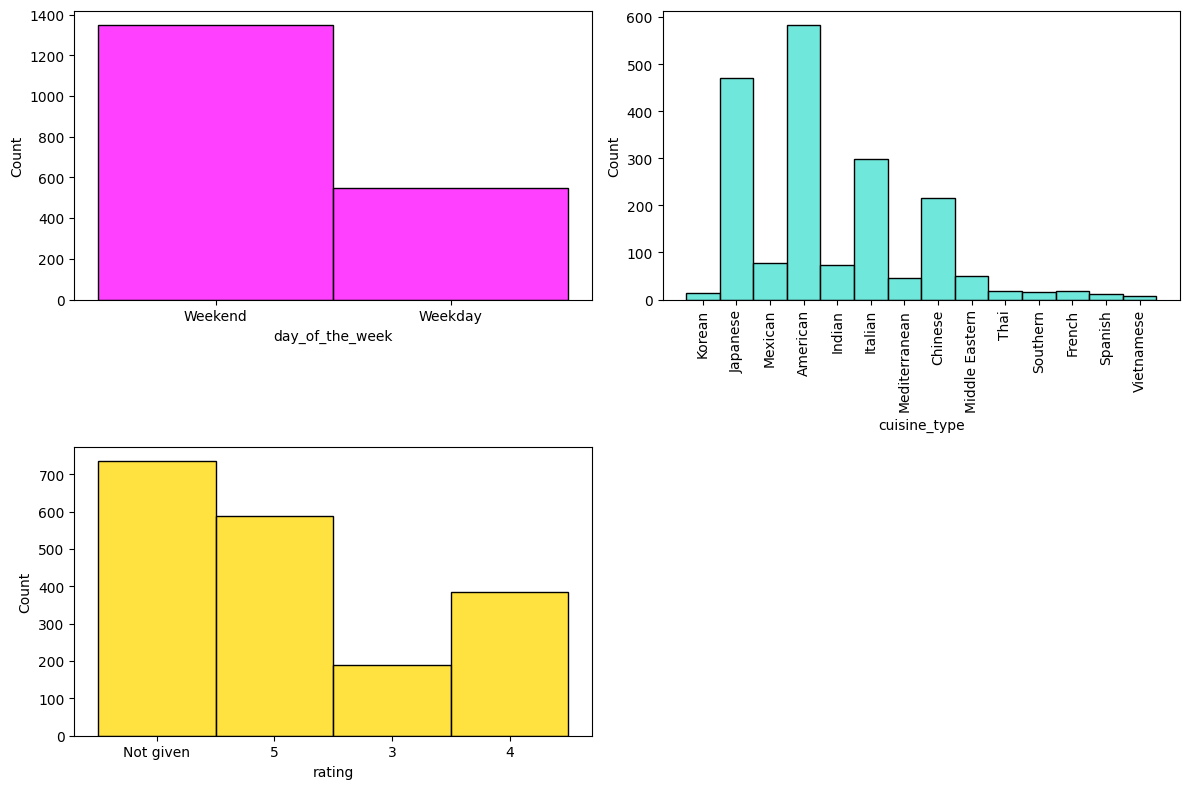

In [23]:
# Categorical Variables

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


sns.histplot(data=food_df, x="day_of_the_week", ax=axes[0,0], color="fuchsia")
sns.histplot(data=food_df, x="cuisine_type", ax=axes[0,1], color="turquoise")
sns.histplot(data=food_df, x="rating", ax=axes[1,0], color="gold")

# Remove the last plot
fig.delaxes(axes[1,1])

plt.setp(axes[0,1].get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

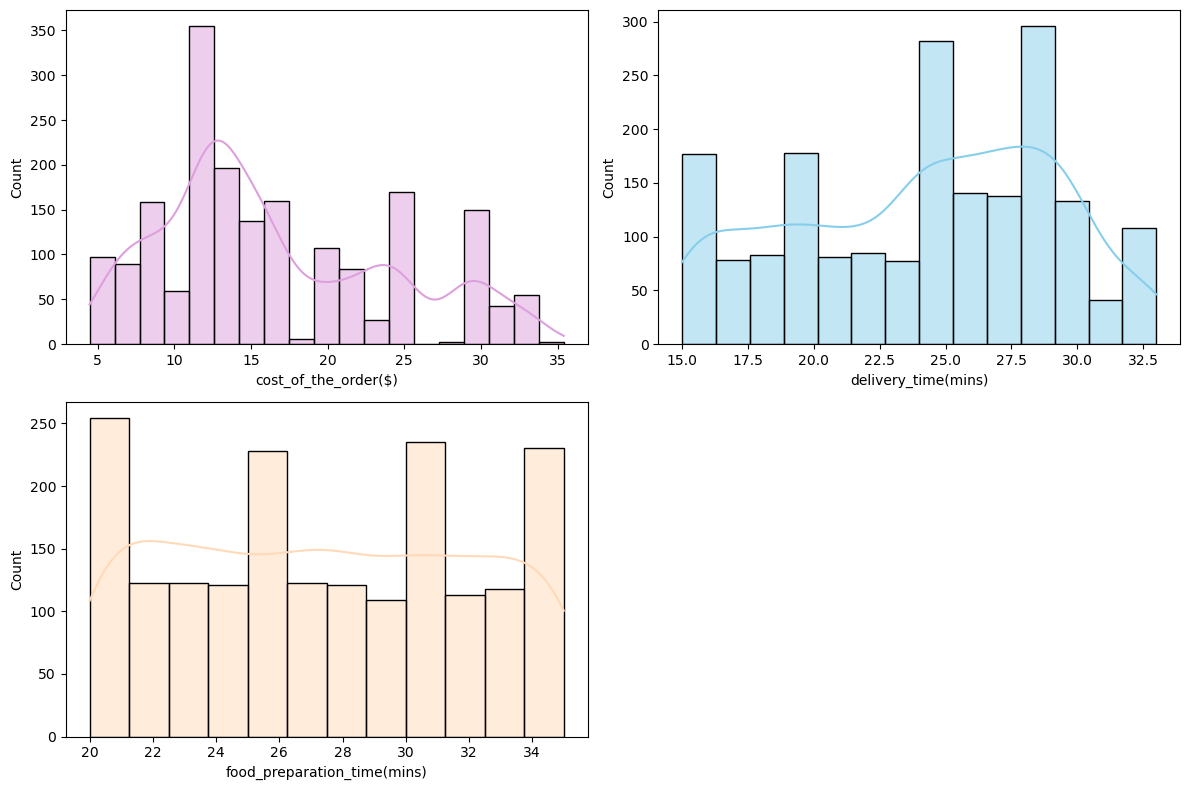

In [29]:
# Numerical Variables
numerical_vars = ['cost_of_the_order($)', 'food_preparation_time(mins)', 'delivery_time(mins)']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(data=food_df, x="cost_of_the_order($)", ax=axes[0,0], kde = True, color="plum")
sns.histplot(data=food_df, x="delivery_time(mins)", ax=axes[0,1], kde = True, color="skyblue")
sns.histplot(data=food_df, x="food_preparation_time(mins)", ax=axes[1,0], kde = True, color="peachpuff") 

# Remove the last plot
fig.delaxes(axes[1,1])


# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


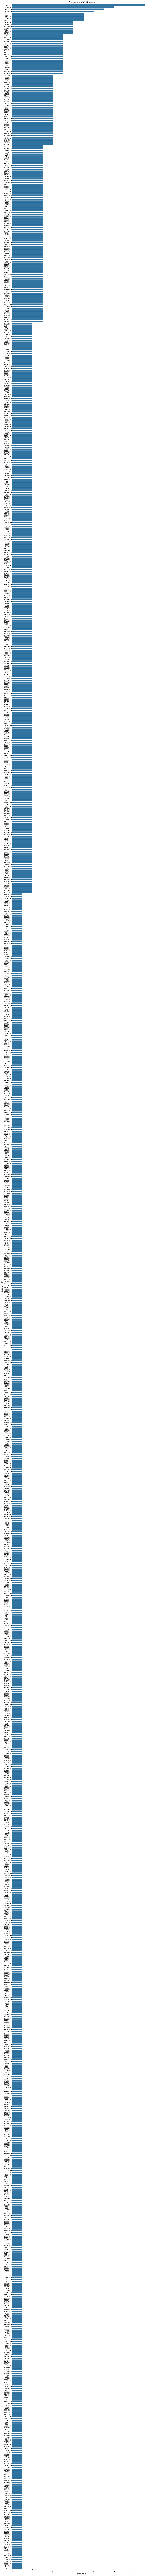

In [24]:
plt.figure(figsize=(12, 200))
sns.countplot(y='customer_id', data=food_df, order=food_df['customer_id'].value_counts().index[:])
plt.title('Frequency of Customers')
plt.xlabel('Frequency')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

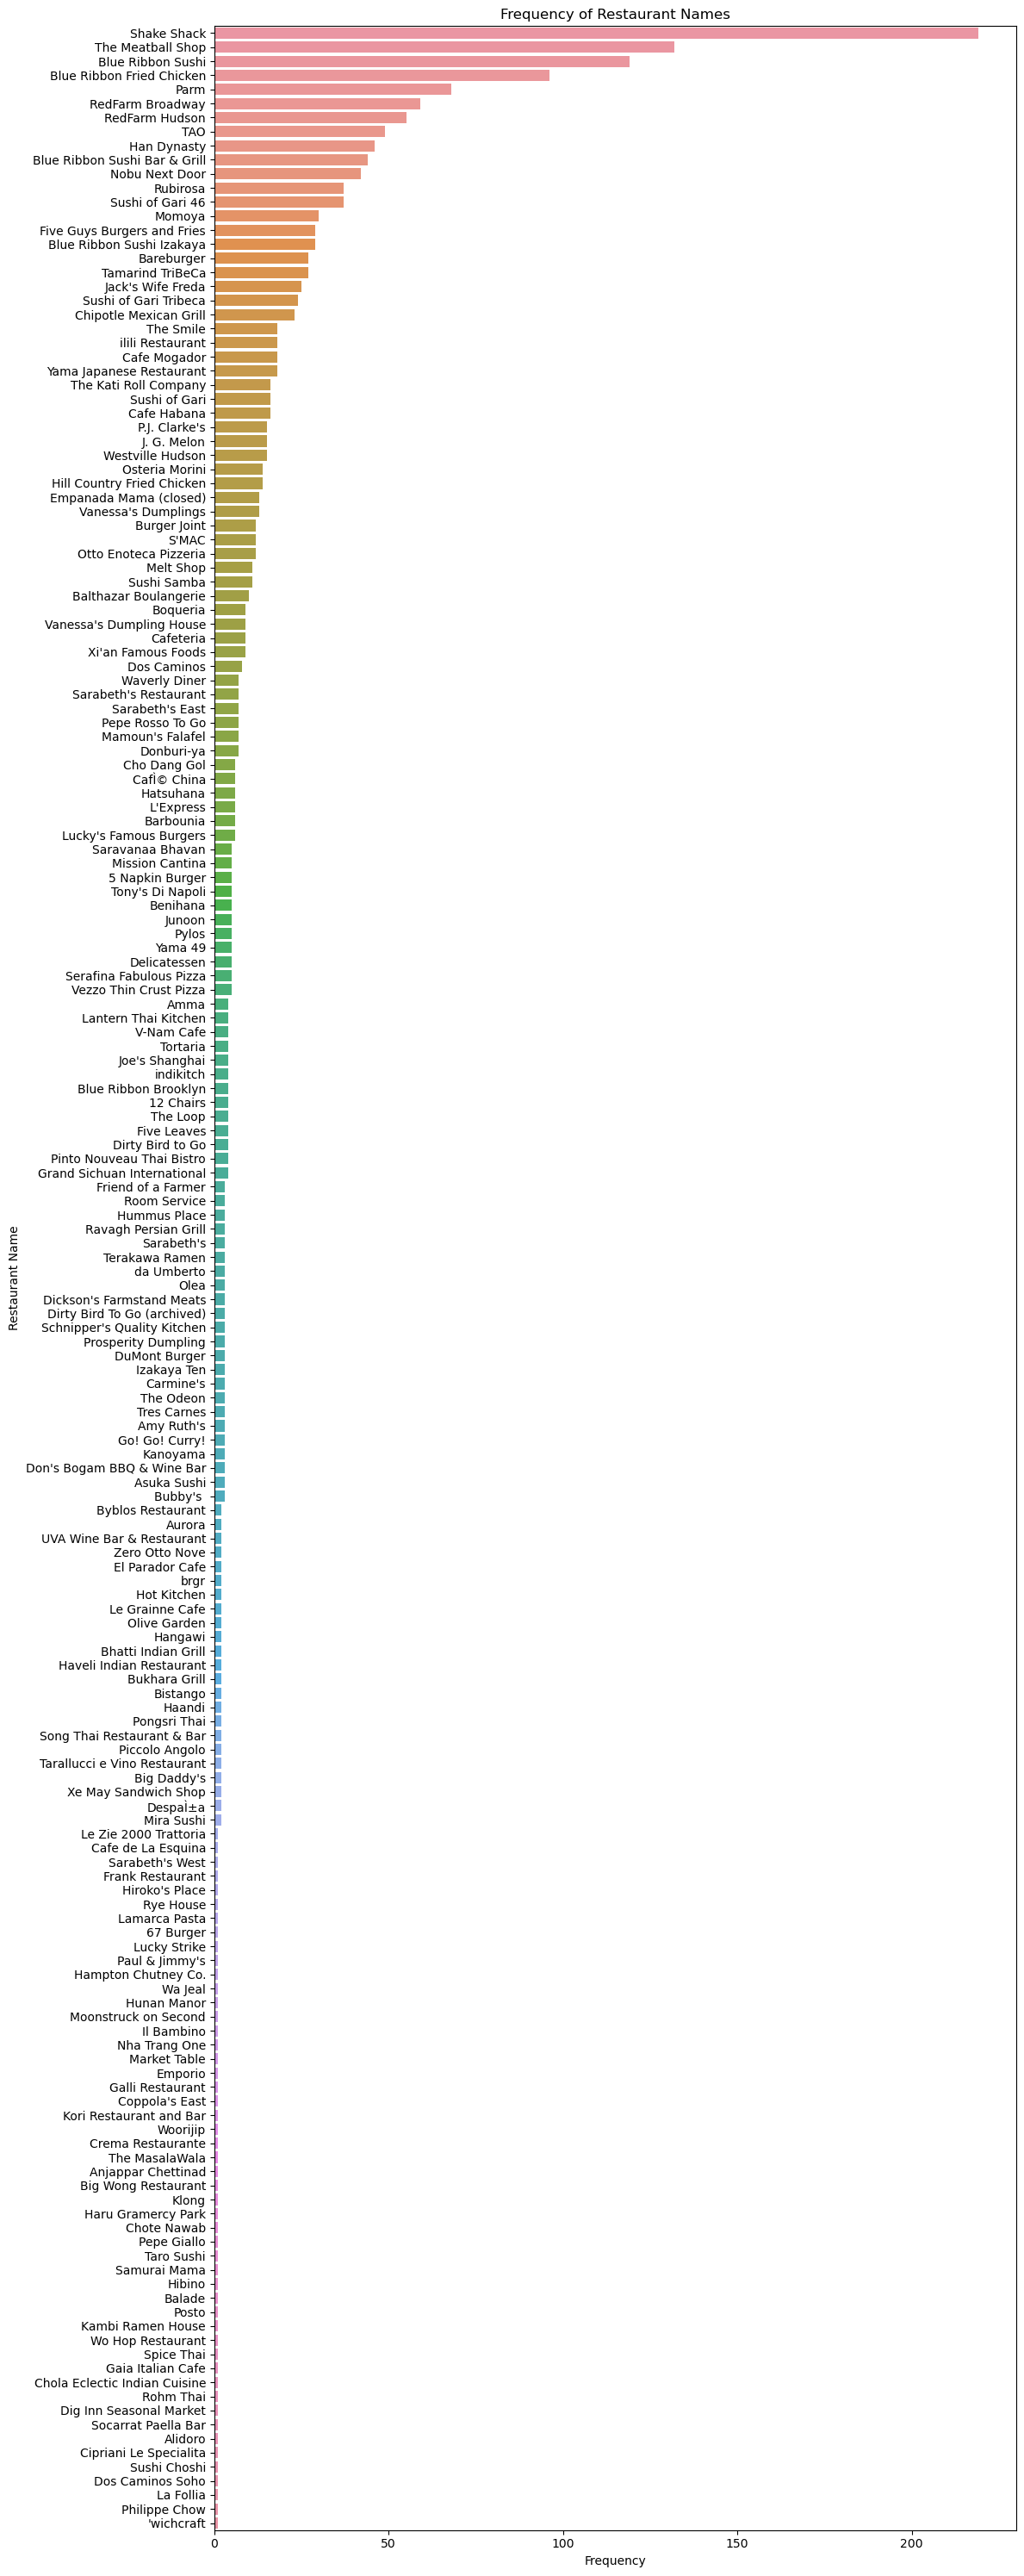

In [31]:
plt.figure(figsize=(12, 30))
sns.countplot(y='restaurant_name', data=food_df, order=food_df['restaurant_name'].value_counts().index[:])
plt.title('Frequency of Restaurant Names')
plt.xlabel('Frequency')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

### Calculating the means, median, mode, standard deviation, minimum, maximum and qaurtiles of delivery_time(mins)

In [54]:
# Calculating the means, median, mode, standard deviation, minimum, maximum and qaurtiles of food_preparation_time(mins)
print(food_df["food_preparation_time(mins)"].describe())
print('mode',food_df["food_preparation_time(mins)"].mode())

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time(mins), dtype: float64
mode 0    21
Name: food_preparation_time(mins), dtype: int64


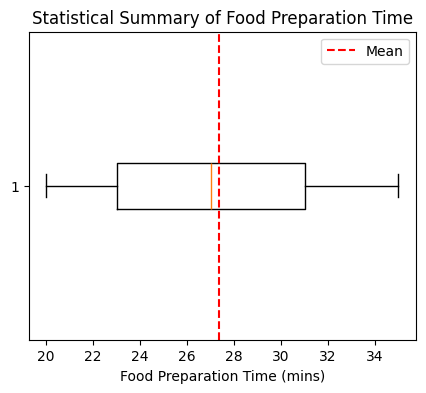

In [55]:
plt.figure(figsize=(5, 4))
plt.boxplot(food_df["food_preparation_time(mins)"], vert=False)
plt.axvline(x=food_df["food_preparation_time(mins)"].mean(), color='r', linestyle='--', label='Mean')
plt.xlabel('Food Preparation Time (mins)')
plt.title('Statistical Summary of Food Preparation Time')
plt.legend()
plt.show()

In [33]:

print(food_df["delivery_time(mins)"].describe())
print("mode" ,food_df["delivery_time(mins)"].mode())

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time(mins), dtype: float64
mode 0    24
Name: delivery_time(mins), dtype: int64


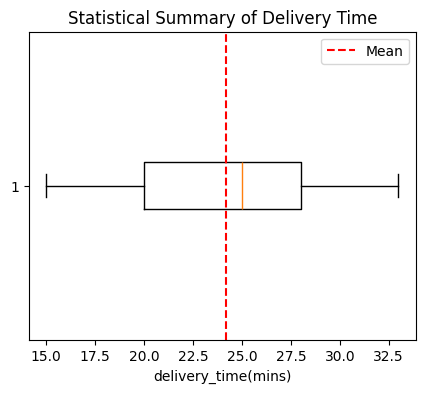

In [34]:
plt.figure(figsize=(5, 4))
plt.boxplot(food_df["delivery_time(mins)"], vert=False)
plt.axvline(x=food_df["delivery_time(mins)"].mean(), color='r', linestyle='--', label='Mean')
plt.xlabel('delivery_time(mins)')
plt.title('Statistical Summary of Delivery Time')
plt.legend()
plt.show()

In [51]:
# Calculating the means, median, mode, standard deviation, minimum, maximum and qaurtiles of rating
print(ratings["rating"].describe())
print('mode',ratings["rating"].mode())

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
mode 0    5
Name: rating, dtype: int32


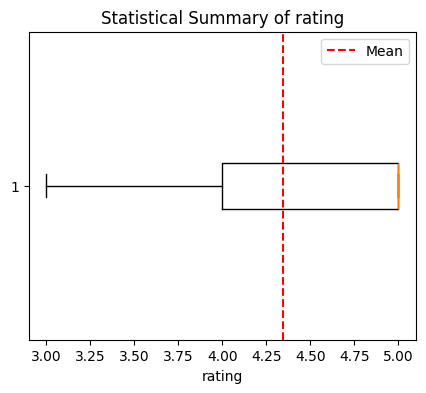

In [32]:
plt.figure(figsize=(5, 4))
plt.boxplot(ratings["rating"], vert=False)
plt.axvline(x=ratings["rating"].mean(), color='r', linestyle='--', label='Mean')
plt.xlabel('rating')
plt.title('Statistical Summary of rating')
plt.legend()
plt.show()

In [33]:
# Average rating of each restaurant
average_ratings = ratings.groupby('restaurant_name')['rating'].mean().reset_index(name='avg_ratings')
average_ratings

,restaurant_name,avg_ratings
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [34]:
# Average delivery time of each restaurant
average_delivery_time = food_df.groupby('restaurant_name')['delivery_time(mins)'].mean().reset_index(name='avg_delivery_time')
average_delivery_time

,restaurant_name,avg_delivery_time
0,'wichcraft,28.000000
1,12 Chairs,27.750000
2,5 Napkin Burger,24.400000
3,67 Burger,28.000000
4,Alidoro,22.000000
...,...,...
173,Zero Otto Nove,21.500000
174,brgr,25.000000
175,da Umberto,28.000000
176,ilili Restaurant,24.888889


In [35]:
# Average food preparation time of each restaurant
average_food_prep_time = food_df.groupby('restaurant_name')['food_preparation_time(mins)'].mean().reset_index(name='avg_food_prep_time')
average_food_prep_time

,restaurant_name,avg_food_prep_time
0,'wichcraft,28.000000
1,12 Chairs,27.000000
2,5 Napkin Burger,30.200000
3,67 Burger,20.000000
4,Alidoro,34.000000
...,...,...
173,Zero Otto Nove,30.000000
174,brgr,25.000000
175,da Umberto,24.333333
176,ilili Restaurant,26.388889


### **Question 3**: Which are the top 5 restaurants in terms of the number of orders received?

In [36]:
# Top 5 restaurants
top_five = food_df["restaurant_name"].value_counts().sort_values(ascending = False).reset_index(name='number_of_orders')
top_five_restaurants = top_five.head()
top_five_restaurants


,restaurant_name,number_of_orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


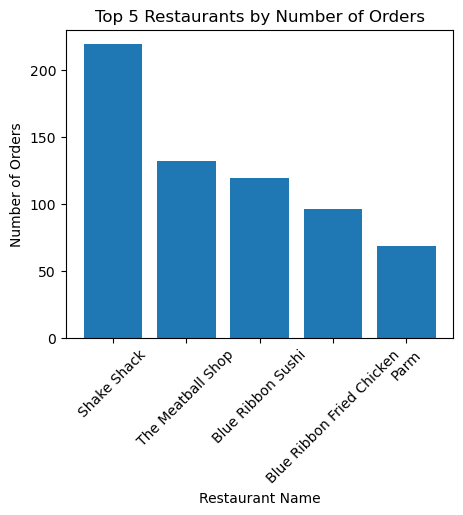

In [42]:
#Top 5 Restaurants by Number of Orders

plt.xticks(rotation=45)
plt.figure(figsize=(5, 4))
plt.bar(top_five_restaurants['restaurant_name'], top_five_restaurants['number_of_orders'])
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xticks(rotation=45)
plt.show()

### **Question 4**: Which is the most popular cuisine on weekends?

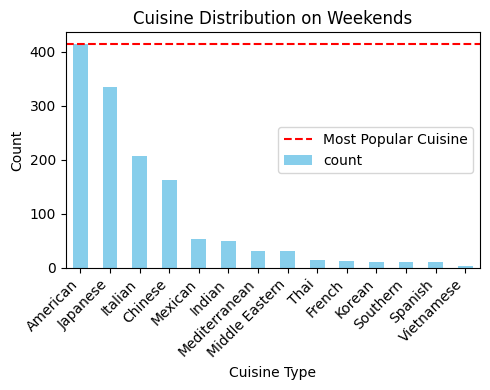

In [80]:
# Plot of Cuisine Type on Weekends.

weekend_data = food_df[food_df['day_of_the_week'].isin(['Weekend'])]

popular_weekend_cuisine = food_df[food_df["day_of_the_week"] == "Weekend"].groupby("cuisine_type").size().sort_values(ascending = False)
top_weekend_cuisine = popular_weekend_cuisine.idxmax()
top_ten_weekend_cuisine = popular_weekend_cuisine.head(10)
cuisine_counts = weekend_data['cuisine_type'].value_counts()
top_weekend_cuisine

plt.figure(figsize=(5, 4))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Cuisine Distribution on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=cuisine_counts[most_popular_cuisine], color='red', linestyle='--', label='Most Popular Cuisine')
plt.legend()
plt.tight_layout()
plt.show()

### **Question 5**: What percentage of the orders cost more than 20 dollars?

In [39]:
# Percentage of the orders that cost more than 20 dollars
twenty_cost_percentage = sum(food_df["cost_of_the_order($)"] > 20) / len(food_df) * 100
print("{}% of the orders cost more than $20".format(twenty_cost_percentage))

29.24130663856691% of the orders cost more than $20


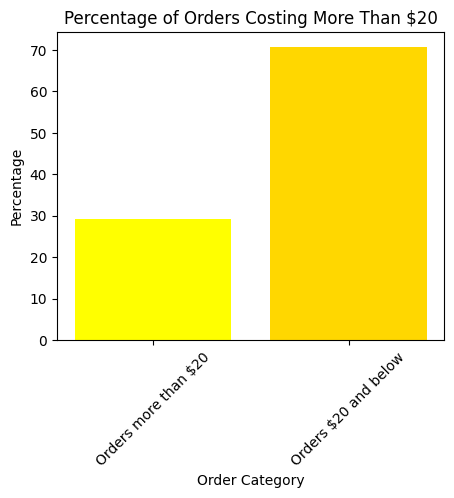

In [40]:
#Percentage of Orders Costing More Than $20

plt.figure(figsize=(5, 4))
plt.bar(['Orders more than $20', 'Orders $20 and below'], 
        [twenty_cost_percentage, 100 - twenty_cost_percentage ],
        color=['yellow', 'gold'])
plt.title('Percentage of Orders Costing More Than $20')
plt.xlabel('Order Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

### **Question 6**: What is the mean order delivery time?

In [41]:
# Mean oder delivery time
avg_delivery_time = food_df["delivery_time(mins)"].mean()
print("The mean order delivery time is {} minutes".format(avg_delivery_time))

The mean order delivery time is 24.161749209694417 minutes


### **Question 7:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [42]:
# Top most frequent customers
freq_customers = food_df["customer_id"].value_counts().sort_values(ascending = False).reset_index(name = 'number_of_orders_placed')
top_three = freq_customers.head(3)
top_three

,customer_id,number_of_orders_placed
0,52832,13
1,47440,10
2,83287,9


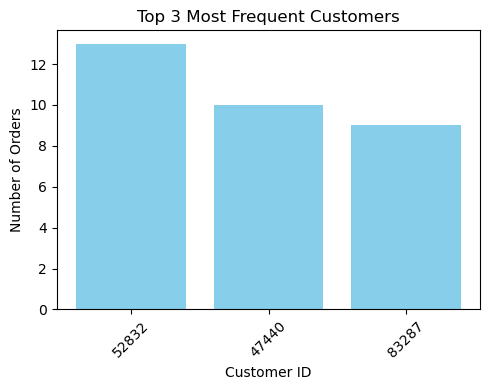

In [48]:
#'Top 3 Most Frequent Customers

plt.figure(figsize=(5, 4))
plt.bar(top_three["customer_id"], top_three['number_of_orders_placed'].sort_values(ascending = False) , color='skyblue')
plt.title('Top 3 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


C:\Users\Grazia E. Graham\AppData\Local\Temp\ipykernel_12592\2745728214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cuisine_type', y='rating', data=ratings,palette='Set2')


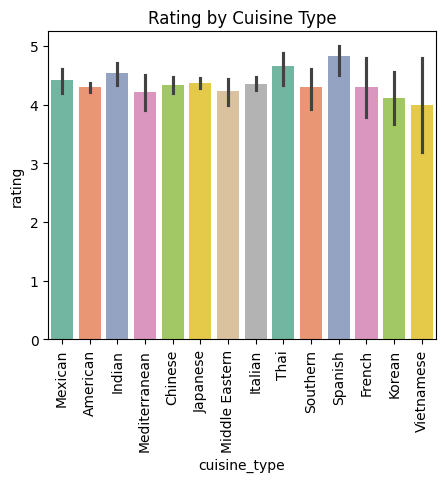

In [44]:
#Rating by Cuisine Type

plt.figure(figsize=(5, 4))
sns.barplot(x='cuisine_type', y='rating', data=ratings,palette='Set2')
plt.title('Rating by Cuisine Type')
plt.xticks(rotation=90)
plt.show()

In [45]:
food_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order($),day_of_the_week,rating,food_preparation_time(mins),delivery_time(mins)
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [46]:
avg_delivery_time_by_day = food_df.groupby('day_of_the_week')['delivery_time(mins)'].mean().reset_index(name='avg_delivery_time_by_day')
avg_delivery_time_by_day

,day_of_the_week,avg_delivery_time_by_day
0,Weekday,28.340037
1,Weekend,22.470022


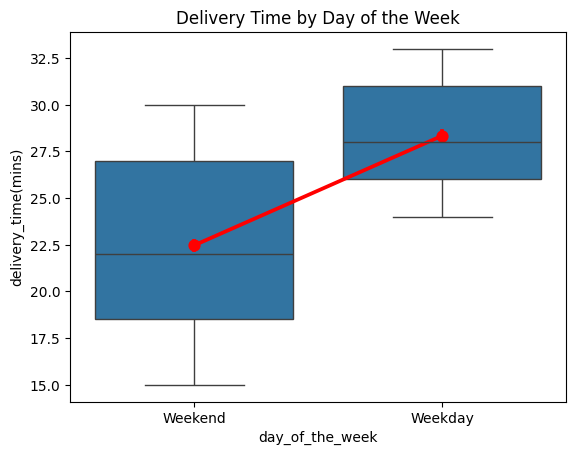

In [47]:
#Delivery Time by Day of the Week
sns.boxplot(x='day_of_the_week', y='delivery_time(mins)', data=food_df)

#Redline connecting the means of the 2 box plots.
sns.pointplot(x='day_of_the_week', y='delivery_time(mins)', data=food_df, color='red', markers='o', linestyles='-')
plt.title('Delivery Time by Day of the Week')
plt.show()

In [42]:
ratings['total_time_required(mins)'] = food_df['food_preparation_time(mins)'] + food_df['delivery_time(mins)'] 

C:\Users\Grazia E. Graham\AppData\Local\Temp\ipykernel_5376\2124965955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['total_time_required(mins)'] = food_df['food_preparation_time(mins)'] + food_df['delivery_time(mins)']


In [44]:
 ratings['sorted_rating'] = ratings['rating'].sort_values(ascending=True)

C:\Users\Grazia E. Graham\AppData\Local\Temp\ipykernel_5376\2403006863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['sorted_rating'] = ratings['rating'].sort_values(ascending=True)


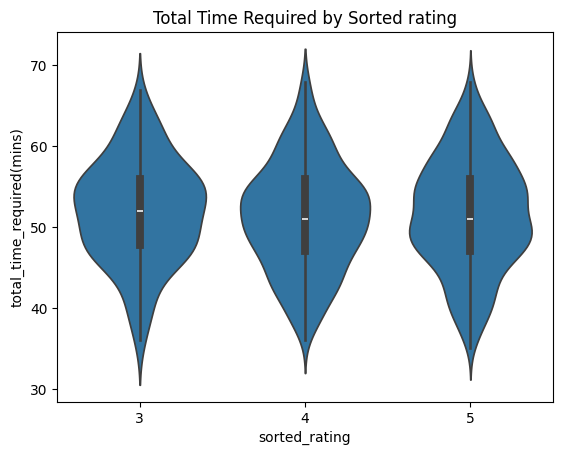

In [45]:
#Total Time Required by Sorted rating
sns.violinplot(x='sorted_rating', y='total_time_required(mins)', data=ratings)
plt.title('Total Time Required by Sorted rating')
plt.show()

# Multivariate Analysis

In [57]:
ratings.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time_required(mins),sorted_rating
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44,3
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63,3


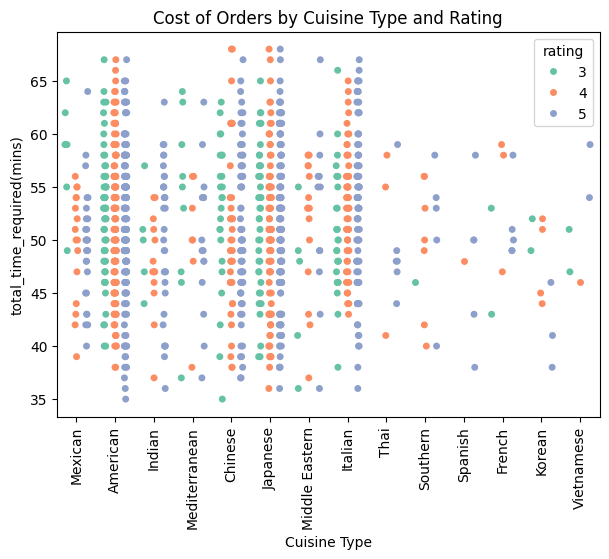

In [75]:
#Cost of Orders by Cuisine Type and Rating
plt.figure(figsize=(7, 5))
sns.stripplot(x='cuisine_type', y='total_time_required(mins)', data=ratings, hue='rating', palette = 'Set2',jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('total_time_required(mins)')
plt.title('Cost of Orders by Cuisine Type and Rating')

plt.show()

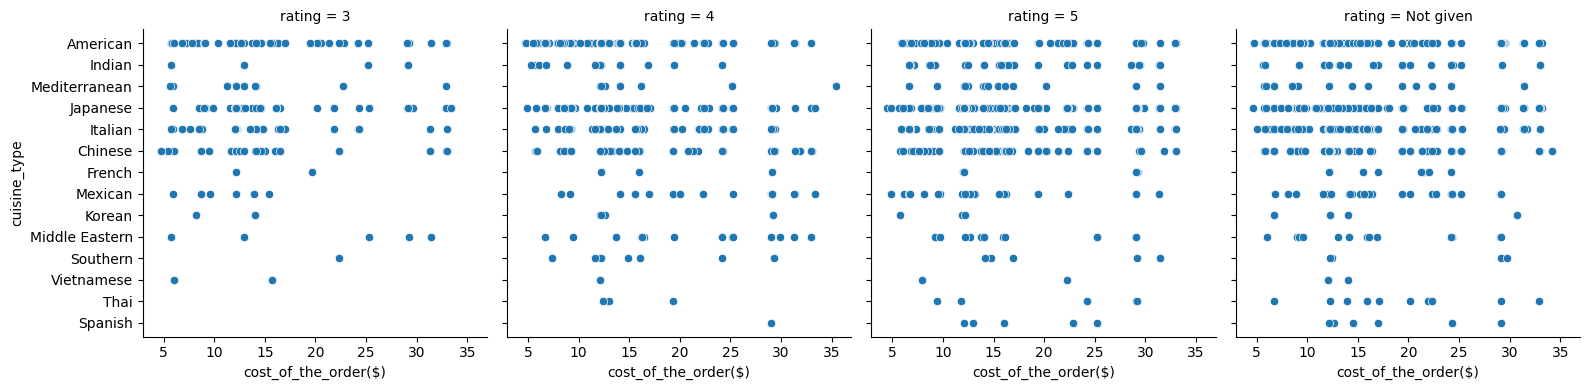

In [49]:
# Multivariate analysis of cuisine type,cost of order and rating.
sns.relplot(y='cuisine_type',x = 'cost_of_the_order($)',data = food_df,
            kind = 'scatter',
           col ='rating',
           col_order = ['3','4','5','Not given'],
           height= 4)

plt.show()

### **Question 9:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [51]:
# Average rating of each restaurant
average_ratings = ratings.groupby('restaurant_name')['rating'].mean().reset_index(name='rating')

# Count of ratings for each restaurants
rating_count = ratings.groupby('restaurant_name').size().sort_values(ascending = False).reset_index(name='count')

# Merge average_ratings and rating_count DataFrames
restaurant_stats = pd.merge(average_ratings, rating_count, on='restaurant_name')

eligible_restaurants = restaurant_stats[(restaurant_stats["count"] > 50) & (restaurant_stats["rating"] > 4)]
eligible_restaurants

,restaurant_name,rating,count
16,Blue Ribbon Fried Chicken,4.328125,64
17,Blue Ribbon Sushi,4.219178,73
117,Shake Shack,4.278195,133
132,The Meatball Shop,4.511905,84


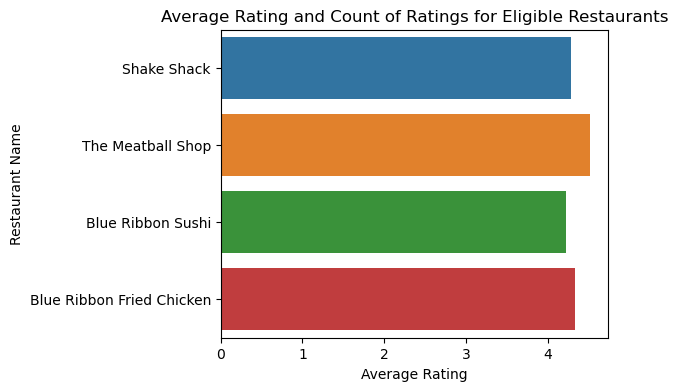

In [56]:
# Sort eligible restaurants by count of ratings
eligible_restaurants_sorted = eligible_restaurants.sort_values(by='count', ascending=False)

# Plotting
plt.figure(figsize=(5, 4))
sns.barplot(x='rating', y='restaurant_name', data=eligible_restaurants_sorted)
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.title('Average Rating and Count of Ratings for Eligible Restaurants')
plt.show()

### **Question 10:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [37]:
net_revenue_greater_than_twenty = (food_df['cost_of_the_order($)'] * 0.25)[food_df['cost_of_the_order($)'] > 20].sum()

net_revenue_between_five_and_twenty = (food_df['cost_of_the_order($)'] * 0.15)[(food_df['cost_of_the_order($)'] > 5) & (food_df['cost_of_the_order($)'] <= 20)].sum()

company_net_revenue = net_revenue_greater_than_twenty + net_revenue_between_five_and_twenty

print("The net revenue generated by the company across all orders is ${}" .format(company_net_revenue))

The net revenue generated by the company across all orders is $6166.303


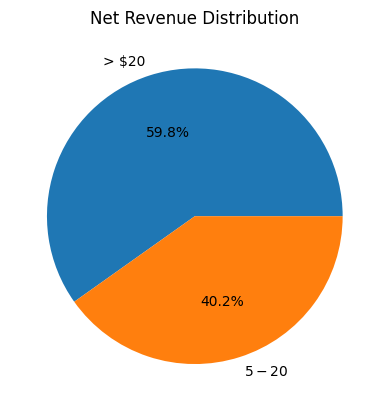

In [54]:
labels = ['> $20', '$5 - $20']
revenues = [net_revenue_greater_than_twenty, net_revenue_between_five_and_twenty]

# Plot a pie chart
plt.pie(revenues, labels=labels, autopct='%1.1f%%')
plt.title('Net Revenue Distribution')
plt.show()

### Amount of revenue that goes to the company versus amount that goes to the restaurants

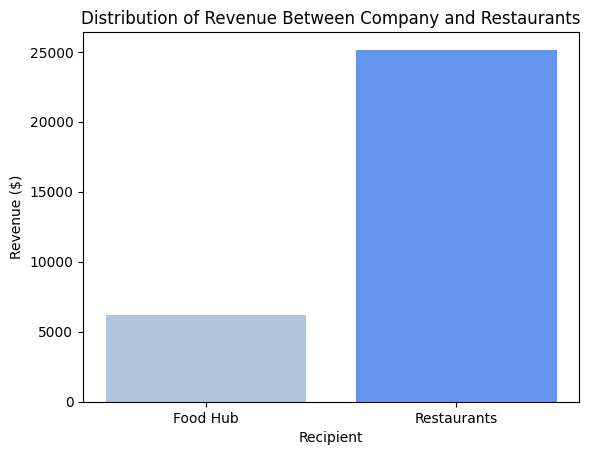

In [38]:
# Total revenue generated from orders
total_revenue = food_df['cost_of_the_order($)'].sum()

# Revenue going to the restaurants
revenue_to_restaurants = total_revenue - company_net_revenue

# Create labels for the bars
labels = ['Food Hub', 'Restaurants']

# Create data for the bars
revenue_data = [company_net_revenue, revenue_to_restaurants]

# Plot a stacked bar chart
plt.bar(labels, revenue_data, color=['lightsteelblue', 'cornflowerblue'])
plt.xlabel('Recipient')
plt.ylabel('Revenue ($)')
plt.title('Distribution of Revenue Between Company and Restaurants')
plt.show()

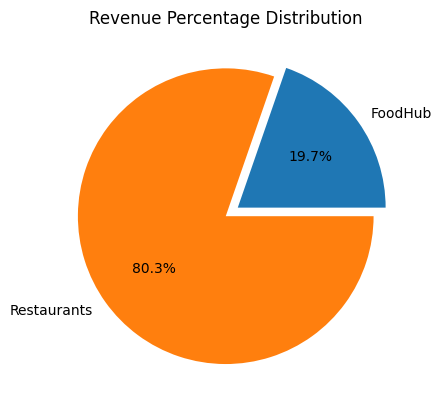

In [81]:
# percentage ratio (Pie Chart)
foodhub_percentage = (company_net_revenue / total_revenue) * 100
restaurants_percentage = (revenue_to_restaurants / total_revenue) * 100
percentage_ratio = foodhub_percentage / restaurants_percentage
percentage_ratio_percentage = percentage_ratio * 100


labels = ['FoodHub', 'Restaurants']
percentages = [foodhub_percentage, restaurants_percentage]

plt.pie(percentages, labels=labels, autopct='%1.1f%%', explode = [0.1,0])
plt.title('Revenue Percentage Distribution')
plt.show()

### **Question 11:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [56]:
food_df['total_time_required(mins)'] = food_df['food_preparation_time(mins)'] + food_df['delivery_time(mins)'] 

more_than_sixty = (len(food_df.loc[food_df['total_time_required(mins)'] > 60]) / len(food_df)) * 100
more_than_sixty

10.537407797681771

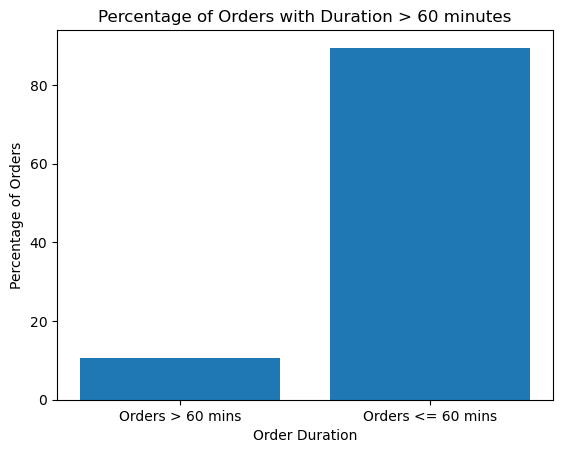

In [61]:
plt.bar(['Orders > 60 mins', 'Orders <= 60 mins'], [more_than_sixty, 100 - more_than_sixty])
plt.xlabel('Order Duration')
plt.ylabel('Percentage of Orders')
plt.title('Percentage of Orders with Duration > 60 minutes')
plt.show()


### **Question 12:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [57]:
weekday_avg_delivery_time = food_df.loc[food_df["day_of_the_week"] == "Weekday", "delivery_time(mins)"].mean()
print("The mean delivery time on weekdays is {} minutes".format(weekday_avg_delivery_time))

weekend_avg_delivery_time = food_df.loc[food_df["day_of_the_week"] == "Weekend", "delivery_time(mins)"].mean()
print("The mean delivery time on weekends is {} minutes".format(weekend_avg_delivery_time))

The mean delivery time on weekdays is 28.340036563071298 minutes
The mean delivery time on weekends is 22.4700222057735 minutes


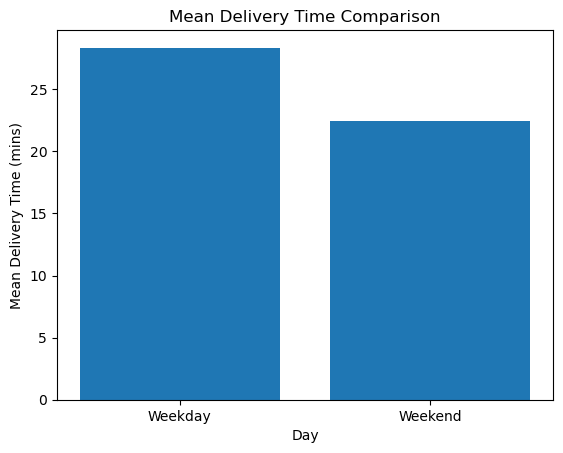

In [63]:
days = ['Weekday', 'Weekend']
mean_delivery_times = [weekday_avg_delivery_time, weekend_avg_delivery_time]

# Plot using Matplotlib
plt.bar(days, mean_delivery_times)
plt.xlabel('Day')
plt.ylabel('Mean Delivery Time (mins)')
plt.title('Mean Delivery Time Comparison')
plt.show()


### **Question 13:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

## Conclusions and Recommendations

*In this exercise, we analyzed the different orders made by registered customers in the online portal of a food aggregator company to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.* 

*Data Analysis helps to find the basic structure of the dataset.*

*Performed Feature Engineering by adding some columns which contribute to our analysis.*

*Data Transformations have been used to normalize the columns.*

*We used different visualizations for EDA like Univariate, Bi-Variate, and Multivariate Analysis.
Through EDA, we got useful insights, and below are some key conclusions and recommendations that will help the company to improve the business:*

### Conclusions

#### *Delivery Time Comparison*:
* The company takes more time to deliver on weekdays than on weekends.

#### *Delivery Time Distribution* :
* More than 85% of the orders take less than 60 minutes to be delivered.

#### *Revenue Distribution*:
* Most of the revenue goes to the restaurants.

#### *Net Revenue Analysis* :
* The company generates 59.8% of its net revenue from orders more than $20 and 40.2% from orders between $5 and $20.

#### *Weekend Cuisine Preferences* :
* American cuisine is ordered the most on weekends.

#### *Weekend vs. Weekday Orders* :
* More foods were ordered on weekends than weekdays.

#### *Top Restaurant in Orders* :
* Shake Shack had the highest number of orders.
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm were the restaurants with the highest number of orders

#### *Order Cost Distribution* :
* Most of the orders cost below $20.

#### *Cuisine Ratings* :
* Spanish cuisine had the highest rating while Vietnamese cuisine had the lowest rating.

#### *Top Restaurant rating*:
* The Meatball shop had the highest average rating.


### Recommendations

#### *Feedback Ratings*:
* Focus on promoting the Spanish cuisine to attract more customers.
* Investigate the root cause of customer dissatisfaction with the vietnamese cuisine
* Reward The meatball shop to encourage quality service and maintain customer satisfaction.

#### *Promotional Strategies*:
* Collaborate with Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm to launch joint marketing campaigns or loyalty programs to attract more customers.
* Leverage social media platforms and online review websites to showcase positive customer experiences and build brand reputation.
* Quarterly reward for top 3 most frequent customers.

#### *Delivery Time Optimization*:
* Optimize delivery routes on weekdays by investing in technology solutions such as route optimization software or delivery tracking systems to reduce delivery time.
* Employ more delivery riders to streamline delivery operations

#### *Customer Engagement and Loyalty*:
* Continue with discount vouchers for repeat orders to enhance customer retention and encourage brand loyalty.
* Engage with customers through personalized communication channels such as email newsletters or mobile apps to keep them informed about new menu items, promotions, and events.
* Foodhub should inform customers on time when food deliveries will exceed 60 minutes
  
#### *Revenue Optimization*:
* Charge the restaurants 25% on the orders having cost ranging from 5 to 20 dollars and  15% on the orders having cost greater than 20 dollars.




*By paying close attention to these conclusions and implementing these recommendations, the company can improve customer satisfaction, increase revenue, and strengthen its position in the competitive food delivery market. Again, it is salient to note that regular monitoring of key performance metrics and ongoing refinement of strategies will be essential to ensure continued success and growth*.









# THANK YOU